In [2]:
#import regular libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#read the complete data into universal dataframe
data = pd.read_csv('refined.csv', encoding='iso=8859-1')

/Users/manjeetchawla/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.columns

Index(['row_id', 'id', 'last_scraped', 'name', 'host_id', 'host_name',
       'host_since', 'host_response_rate', 'host_neighbourhood',
       'host_total_listings_count', 'street', 'neighbourhood_cleansed', 'city',
       'zipcode', 'market', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

## Trying 1st Linear Regression model with accomodates (data) and price (target)

In [15]:
#creating smaller dataframe, subset of universal dataframe to build 1st linear model
df1 = data.loc[:, ['row_id','accommodates','price']]
df1 = df1[:1000] # making dataframe smaller for ease of repeating steps
len(df1)

1000

In [22]:
# distributing columns into feature and target
X = df1['accommodates'].values.reshape(-1,1)
y = df1['price'].values.reshape(-1,1)
print('X Shape: ', X.shape, 'y shape: ',y.shape)

X Shape:  (1000, 1) y shape:  (1000, 1)


In [85]:
X_test[0:5], y_test[:5]

(array([[ 2.],
        [ 3.],
        [ 4.],
        [ 2.],
        [ 2.]]), array([[ 124.],
        [ 250.],
        [ 225.],
        [  70.],
        [  80.]]))

In [23]:
#split data into training and testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=4)


In [64]:
X_test.shape

(250, 1)

In [24]:
#creating model 

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
#fitting model on training dataset
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
#checking coefficients and intercept of model

print('Coefficient: ', model.coef_)
print('y-intercept: ',model.intercept_)

Coefficient:  [[ 39.38295645]]
y-intercept:  [ 97.50174259]


In [31]:
#making model predict price using test dataset
predictions = model.predict(X_test)
# predictions[:5]

In [32]:
#testing how good model is by calculating mean square and r2
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean squared error: ', mse)
print('r2 score: ', r2)

Mean squared error:  99955.4171867
r2 score:  0.21524288412


In [49]:
#check model score for both test and training
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'test_score: {test_score}\n train_score: {train_score}')

test_score: 0.2152428841201749
 train_score: 0.18974252871824102


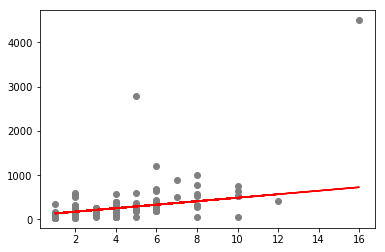

In [77]:
#trying to plot both datapoints
%matplotlib inline 
# to show plot using plt.scatter and not having to do plt.show()
plt.scatter(X_test, y_test, c='grey')
plt.plot(X_test, predictions, c='red')
# plt.scatter(X_test, predictions, c='green')
# plt.show()

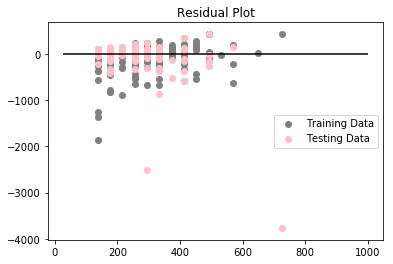

In [112]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='grey', label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="pink", label="Testing Data")
plt.legend(loc='center right')
# plt.hlines(y=0, xmin=y.min(), xmax=y.max()) # not displaying clear results
plt.hlines(y=0, xmin=y.min(),xmax=1000) #so changing xmax
plt.title("Residual Plot")
### END SOLUTION

In [180]:
#transfering X-test, y_test and predictins into df <-- fix it
# df_predict = pd.DataFrame({'x_test': [X_test]})#, 'y_test': y_test, 'predicted_y': predictions})
# df_predict.head(100)
type(X_test)

pandas.core.frame.DataFrame

### Trying Multi-variate linear Regression model with Bedrooms, Bathrooms (data) and Price (target)

In [169]:
#creating smaller dataframe, subset of universal dataframe to build 1st linear model
df2 = data.loc[:, ['row_id','bedrooms','bathrooms','price']]
df2 = df2[:10000] # making dataframe smaller for ease of repeating steps
len(df2)

10000

In [170]:
#filling blank rows with 0
df2 = df2.fillna(0)

In [171]:
#assigning features and target variables
X = df2[['bedrooms', 'bathrooms']]
y = df2['price'].values.reshape(-1,1)

In [172]:
#spliting data test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=43)

In [173]:
#creating model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [174]:
#model fit
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [175]:
print\
(f'coeffs\nbedrooms: {model.coef_[0][0]}\nbathrooms:\
{model.coef_[0][1]} \nintercept {model.intercept_[0]}')


coeffs
bedrooms: 111.10582806182954
bathrooms:54.68633676626873 
intercept 5.743189660451037


In [143]:
#checking the training model score
training = model.score(X_train, y_train)
testing = model.score(X_test, y_test)
training, testing

(0.31223159316183036, 0.25685854540623321)

In [176]:
# predicting using model
predicted = model.predict(X_test)

# checking mse and r2
from sklearn.metrics import mean_squared_error, r2_score

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 52198.23043408427
R-squared (R2 ): 0.21598123433556216


### Doing same multivariate model by standardizing data but only for  <font color='red'>OCT-17 data</font> 

In [387]:
#reading oct-17 listings from data folder
oct_df = pd.read_csv('data/oct17-listings.csv', encoding = 'iso8859')

In [359]:
#snapshot of oct_df
oct_df.head(3)

,row_id,id,scrape_id,last_scraped,name,host_id,host_name,host_since,host_response_rate,host_neighbourhood,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,1,16570521,2.020000e+13,10/2/17,Lands' End hideaway,21303289,Eugenia And Alessandro,9/14/14,100%,Sea Cliff,...,10.0,10.0,9.0,9.0,10.0,10.0,f,moderate,2,2.02
1,2,8001958,2.020000e+13,10/2/17,Ocean and park front panoramic view,24591867,Raul,12/7/14,NaN,Richmond District,...,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,1,NaN
2,3,8388658,2.020000e+13,10/2/17,Mid-century Seacliff near GG Bridge,9996441,Howard,11/13/13,NaN,Sea Cliff,...,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,1,NaN


In [361]:
#creating a list of columns that has special characters to replace it.
cols = ['host_response_rate','price','weekly_price','security_deposit','cleaning_fee','extra_people']

oct_df[cols] = oct_df[cols].replace({'\$':'', ',':'', '%':''}, regex=True)

In [362]:
#filling up Nans using avg/0 of that column
oct_df.accommodates = oct_df.accommodates.fillna(2) #assuming house/room accomodates atleast 2 people
oct_df.bedrooms = oct_df.bedrooms.fillna(1) #assuming atleast 1 bedroom is up for hosting
oct_df.bathrooms = oct_df.bathrooms.fillna(1) #assuming atleast 1 bathroom is available
oct_df.beds = oct_df.beds.fillna(1) # assuming atleast 1 bed is available 
oct_df.security_deposit = oct_df.security_deposit.fillna(0) #if security deposit not mentioned, assuming it 0
oct_df.cleaning_fee = oct_df.cleaning_fee.fillna(0) #if cleaning fee not mentioned, assuming it to be 0
oct_df.price = oct_df.price.astype(float)

In [363]:
# selecting variables for 1st model for Oct 2017 data
oct_df.security_deposit.head(5)

0    150.00 
1          0
2    250.00 
3    500.00 
4    500.00 
Name: security_deposit, dtype: object

In [364]:
oct_df.columns

Index(['row_id', 'id', 'scrape_id', 'last_scraped', 'name', 'host_id',
       'host_name', 'host_since', 'host_response_rate', 'host_neighbourhood',
       'host_total_listings_count', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
   

In [365]:
##splitting features to be used for modeling
X = pd.get_dummies(oct_df[['neighbourhood_cleansed','bed_type']])
y = oct_df['price'].values.reshape(-1,1)
print(X.shape,y.shape)

(8933, 42) (8933, 1)


In [366]:
X.head()

,neighbourhood_cleansed_Bayview,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Crocker Amazon,neighbourhood_cleansed_Diamond Heights,neighbourhood_cleansed_Downtown/Civic Center,neighbourhood_cleansed_Excelsior,neighbourhood_cleansed_Financial District,neighbourhood_cleansed_Glen Park,...,neighbourhood_cleansed_Treasure Island/YBI,neighbourhood_cleansed_Twin Peaks,neighbourhood_cleansed_Visitacion Valley,neighbourhood_cleansed_West of Twin Peaks,neighbourhood_cleansed_Western Addition,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [367]:
y[0]

array([ 120.])

In [368]:
#spliting dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data

# ### BEGIN SOLUTION
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

# ### BEGIN SOLUTION
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)
# ### END SOLUTION

In [377]:
X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape

((6699, 42), (6699, 1), (2234, 42), (2234, 1))

In [378]:
# creating the model and trying model fit
model2 = LinearRegression()
model2.fit(X_train,y_train)
model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [381]:
#creating predictions from model
predictions = model2.predict(X_test)
predictions

array([[ 260.5],
       [ 212.5],
       [ 176.5],
       ..., 
       [ 223. ],
       [ 299. ],
       [ 299. ]])

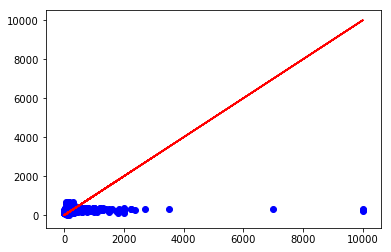

In [382]:
#plotting the predictions and test values
plt.plot(y_test,y_test, c='red')
plt.scatter(y_test, predictions, c='blue')
plt.show()

In [389]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

MSE, r2

(209090.4347582811, 0.0055152033163204939)